# Классификация отзывов к фильмам: 
пример бинарной классификации

## Загрузка набора данных IMDB

In [16]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Аргумент num_words=10000 означает, что в обучающих данных будет сохранено 
только 10 000 слов

In [17]:
# получаем словарь слов из базы данных imdb
word_index = imdb.get_word_index()
# получаем, обратное представление словаря, отображающее индексы в слова
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# декодируем отзыв
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

## Кодирование последовательностей целых чисел в бинарную матрицу

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Создание матрицы с формой
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Запись единицы в элемент с данным индексом
        results[i, sequence] = 1
    return results

In [19]:
#  векторизуем данные
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Создаем структуру нейросети

In [21]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# вариант использования нестандартных функций потерь, метрик и оптимизатора
from keras import losses, metrics, optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

c:\Users\igorv\OneDrive\Documents\GitHub\Neural Networks\.venv\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Проверяем решение

In [23]:
# создаем проверочный набор
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
# производим обучение
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5255 - acc: 0.7799 - val_loss: 0.3997 - val_acc: 0.8683
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3288 - acc: 0.8921 - val_loss: 0.3464 - val_acc: 0.8623
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2501 - acc: 0.9142 - val_loss: 0.3217 - val_acc: 0.8680
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2013 - acc: 0.9315 - val_loss: 0.2837 - val_acc: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1694 - acc: 0.9421 - val_loss: 0.2779 - val_acc: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1433 - acc: 0.9530 - val_loss: 0.2846 - val_acc: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1191 - acc: 0.9645 - val_loss: 0.3128 - val_acc: 0.8773
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1084 - a

формируем графики потерь на этапах обучения и проверки

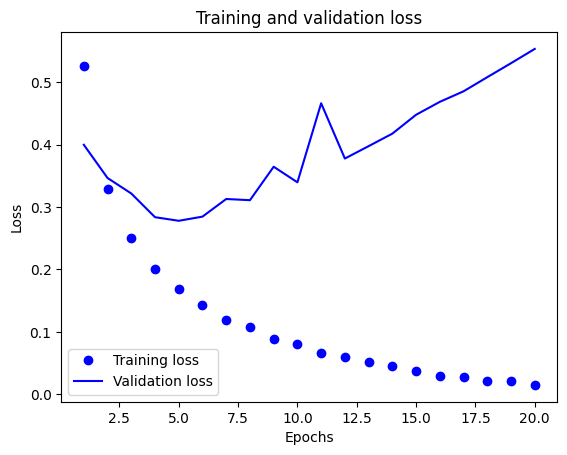

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

формируем графики точности на этапе обучения и проверки

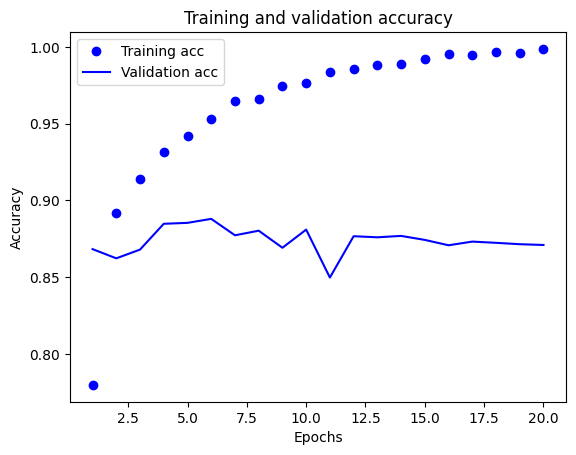

In [28]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Обучение новой модели с нуля

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4939 - accuracy: 0.8079
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2968 - accuracy: 0.9000
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2292 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2830 - accuracy: 0.8868


In [30]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.2660179 ],
       [0.99814826],
       [0.8995355 ],
       ...,
       [0.1300359 ],
       [0.09740522],
       [0.64217633]], dtype=float32)